<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project: Ames Housing Data and Kaggle Challenge


## Problem Statement

We are consultants hired by the U.S Department of Education, researching on how to allocate resources to improve participation rates and/or scores for SAT and/or ACT in the United States.
In this project, we intend to evaluate if there is a ACT score bias for households with higher or lower median income. Specifically, we will explore the association of statewide ACT mean score and median family income, and try to establish a linear regression model between them


### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Hypothesis Test](#Hypothesis-Test)
- [Linear regression model](#Linear-regression-model)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Data Visualization](#Visualize-the-Data)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).


Many colleges and universities have implemented different test optional policies due to COVID-19 restrictions([Source](https://www.crimsoneducation.org/sg/blog/test-prep/the-complete-list-of-us-universities-going-test-optional-in-2021-22/)):
- Test-optional: Those colleges accept but do not require scores.
- Test-Flexibale: Students can provide other scores such as IB grades to replace SAT/ACT
- Test-Blind: Those colleges will not take SAT/ACT score into account even if they are submited


The popularity of SAT/ACT varies extremely among different states. ACT test is more popular in midwest and southwester states while SAT test is favored by  Northeast and the Pacific Northwest states. Other than historical reason, the popularity of ACT/SAT are also affected by the following reasons:
1. some states such as Colorado and Delaware require SAT test for high school graduation [source](https://kdcollegeprep.com/act-vs-sat-test-difference/)
2. some states such as Alabama and Montana require ACT test for graduation [source](https://kdcollegeprep.com/act-vs-sat-test-difference/)

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

* [`median_family_income_2019.csv`](./data/median_family_income_2019.csv): Statewide median family income among households with children under age 18 in the United States ([*source*](https://datacenter.kidscount.org/data/tables/65-median-family-income-among-households-with-children?loc=1&loct=2#detailed/2/2-53/false/1729/any/365))

# define some functions

In [88]:
def plot_features_numeric(df,x_columns, y_column):
    fig, axs = plt.subplots(1, len(x_columns),constrained_layout=True, figsize=(12,3))
    for i in range(len(x_columns)):
        sns.histplot(data=df, x=x_columns[i], kde=True, color="skyblue", ax=axs[i])
    sns.pairplot(df, x_vars=x_columns, y_vars=y_column)

In [89]:
def plot_features_catagorical(df,x_columns, y_column):
    fig, axs = plt.subplots(1, len(x_columns),constrained_layout=True, figsize=(12,3))
    for i in range(len(x_columns)):
        sns.histplot(data=df, x=x_columns[i], kde=False, color="skyblue", ax=axs[i])
    
    fig2, axs2 = plt.subplots(1, len(x_columns),constrained_layout=True, figsize=(12,3))
    for j in range(len(x_columns)):
         sns.boxplot(x=x_columns[j], y=y_column, data=df, ax=axs2[j])
    

In [90]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression,LassoCV, RidgeCV
from sklearn import metrics

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline


pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Data Import and Cleaning

In [91]:
# read the files
df = pd.read_csv("../datasets/train.csv")
df.head().T

,0,1,2,3,4
Id,109,544,153,318,255
PID,533352170,531379050,535304180,916386060,906425045
MS SubClass,60,60,20,60,50
MS Zoning,RL,RL,RL,RL,RL
Lot Frontage,NaN,43.0,68.0,73.0,82.0
Lot Area,13517,11492,7922,9802,14235
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,IR1,Reg,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### after comparing the data directory and dataframe Dtypes, and found the following columns need to convert to string type
- id
- pid
- ms_subclass

In [93]:
#rename column
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")
#change column type, according to data directory
str_type_columns=["id", "pid","ms_subclass"]
for column in str_type_columns:
    df[column]=df[column].astype("object")

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   object 
 1   pid              2051 non-null   object 
 2   ms_subclass      2051 non-null   object 
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [95]:
#rearrange the columns such that all feature of 'object' type will be moved before all numeric 

df2=pd.DataFrame()
columns_copy = df.columns.tolist()
for column in columns_copy:
    if df[column].dtype == object:
        column_to_reorder = df.pop(column)
        df.insert(3, column, column_to_reorder)
   # else:
    #    df2.insert(-1, df.columns[i], column_to_reorder)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   object 
 1   pid              2051 non-null   object 
 2   ms_subclass      2051 non-null   object 
 3   sale_type        2051 non-null   object 
 4   misc_feature     65 non-null     object 
 5   fence            400 non-null    object 
 6   pool_qc          9 non-null      object 
 7   paved_drive      2051 non-null   object 
 8   garage_cond      1937 non-null   object 
 9   garage_qual      1937 non-null   object 
 10  garage_finish    1937 non-null   object 
 11  garage_type      1938 non-null   object 
 12  fireplace_qu     1051 non-null   object 
 13  functional       2051 non-null   object 
 14  kitchen_qual     2051 non-null   object 
 15  electrical       2051 non-null   object 
 16  central_air      2051 non-null   object 
 17  heating_qc    

In [96]:
print("from above, we can see: column #2 to #44 are of catagorical features  ")
print("from above, we can see: column #44 and above are of catagorical features  ")

from above, we can see: column #2 to #44 are of catagorical features  
from above, we can see: column #44 and above are of catagorical features  


In [97]:
features_catagorical = df.columns[2:45]
print(features_catagorical)

features_numeric = df.columns[45:-1]
print(features_numeric)

Index(['ms_subclass', 'sale_type', 'misc_feature', 'fence', 'pool_qc',
       'paved_drive', 'garage_cond', 'garage_qual', 'garage_finish',
       'garage_type', 'fireplace_qu', 'functional', 'kitchen_qual',
       'electrical', 'central_air', 'heating_qc', 'heating', 'bsmtfin_type_2',
       'bsmtfin_type_1', 'bsmt_exposure', 'bsmt_cond', 'bsmt_qual',
       'foundation', 'exter_cond', 'exter_qual', 'mas_vnr_type',
       'exterior_2nd', 'exterior_1st', 'roof_matl', 'roof_style',
       'house_style', 'bldg_type', 'condition_2', 'condition_1',
       'neighborhood', 'land_slope', 'lot_config', 'utilities', 'land_contour',
       'lot_shape', 'alley', 'street', 'ms_zoning'],
      dtype='object')
Index(['lot_frontage', 'lot_area', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_h

## checking null values

In [98]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

pool_qc            0.995612
misc_feature       0.968308
alley              0.931741
fence              0.804973
fireplace_qu       0.487567
lot_frontage       0.160897
garage_yr_blt      0.055583
garage_cond        0.055583
garage_qual        0.055583
garage_finish      0.055583
garage_type        0.055095
bsmt_exposure      0.028279
bsmtfin_type_2     0.027304
bsmt_cond          0.026816
bsmt_qual          0.026816
bsmtfin_type_1     0.026816
mas_vnr_type       0.010726
mas_vnr_area       0.010726
bsmt_full_bath     0.000975
bsmt_half_bath     0.000975
garage_cars        0.000488
garage_area        0.000488
total_bsmt_sf      0.000488
bsmt_unf_sf        0.000488
bsmtfin_sf_2       0.000488
bsmtfin_sf_1       0.000488
2nd_flr_sf         0.000000
low_qual_fin_sf    0.000000
1st_flr_sf         0.000000
half_bath          0.000000
gr_liv_area        0.000000
full_bath          0.000000
id                 0.000000
bedroom_abvgr      0.000000
kitchen_abvgr      0.000000
totrms_abvgrd      0

we will not consider the following features with too many null value:

feature            null value %

pool_qc            0.995612

misc_feature       0.968308

alley              0.931741

fence              0.804973

fireplace_qu       0.487567

lot_frontage       0.160897

In [99]:
features_numeric=features_numeric.drop('lot_frontage')
print(features_numeric)

Index(['lot_area', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf',
       'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath',
       'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr',
       'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars',
       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch',
       '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold',
       'yr_sold'],
      dtype='object')


In [100]:
features_catagorical=features_catagorical.drop(['pool_qc','misc_feature','alley','fence','fireplace_qu'])
print(features_catagorical)

Index(['ms_subclass', 'sale_type', 'paved_drive', 'garage_cond', 'garage_qual',
       'garage_finish', 'garage_type', 'functional', 'kitchen_qual',
       'electrical', 'central_air', 'heating_qc', 'heating', 'bsmtfin_type_2',
       'bsmtfin_type_1', 'bsmt_exposure', 'bsmt_cond', 'bsmt_qual',
       'foundation', 'exter_cond', 'exter_qual', 'mas_vnr_type',
       'exterior_2nd', 'exterior_1st', 'roof_matl', 'roof_style',
       'house_style', 'bldg_type', 'condition_2', 'condition_1',
       'neighborhood', 'land_slope', 'lot_config', 'utilities', 'land_contour',
       'lot_shape', 'street', 'ms_zoning'],
      dtype='object')


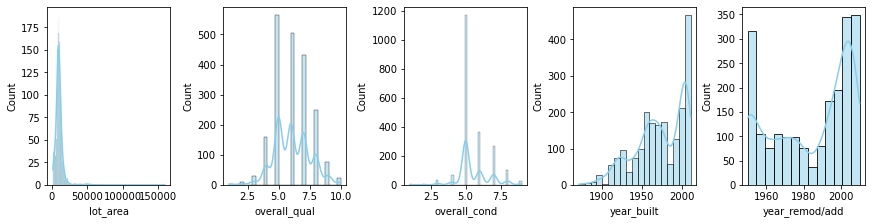

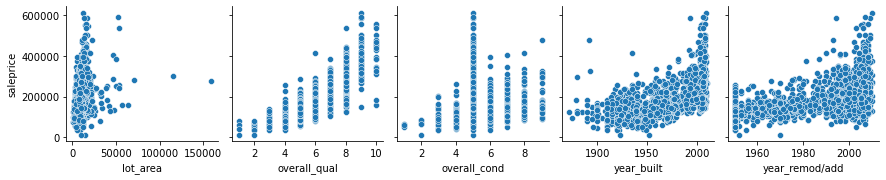

In [101]:
plot_features_numeric(df,features_numeric[:5],"saleprice")

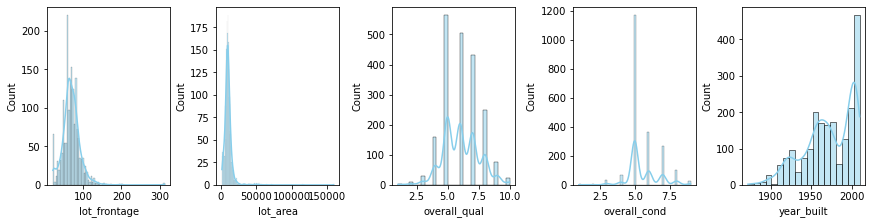

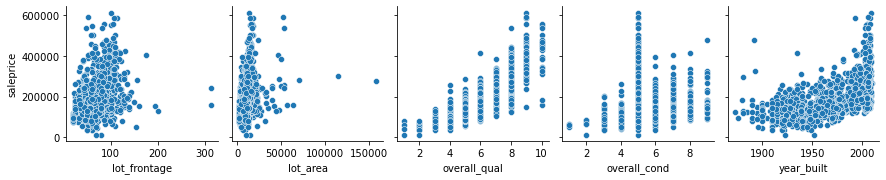

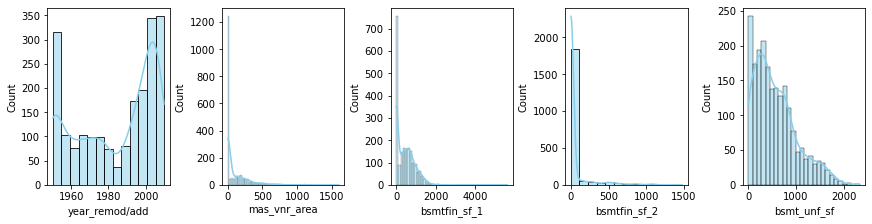

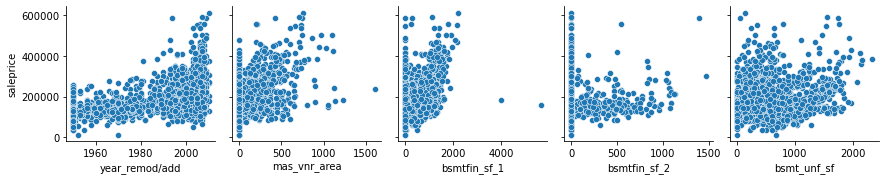

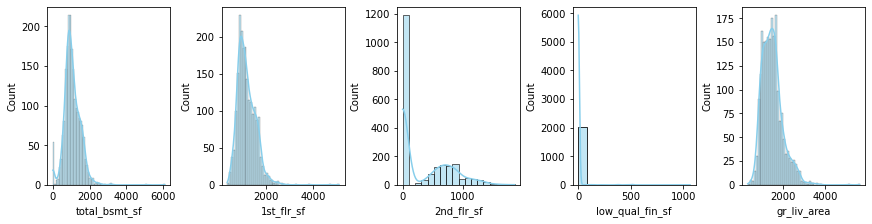

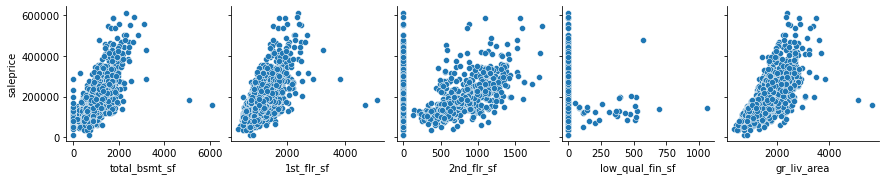

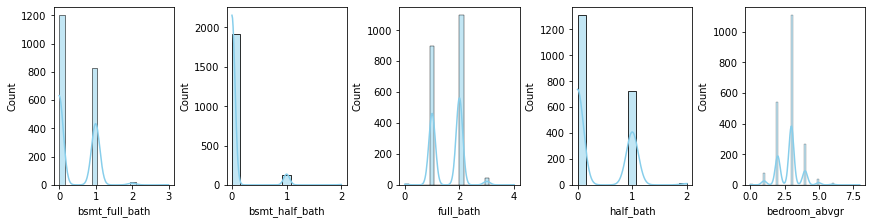

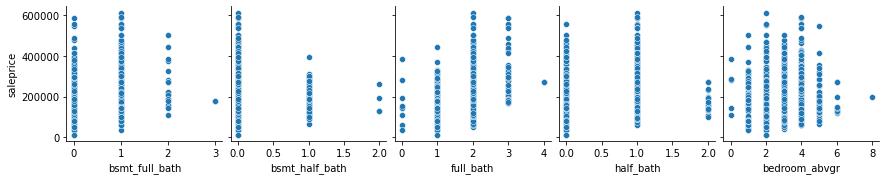

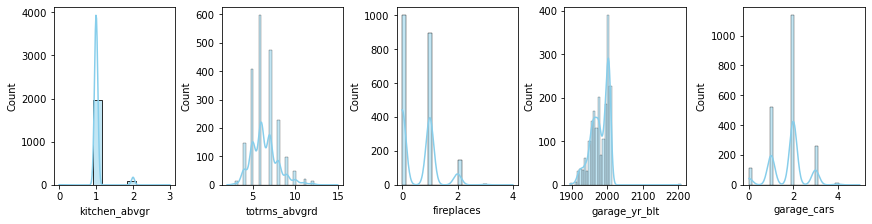

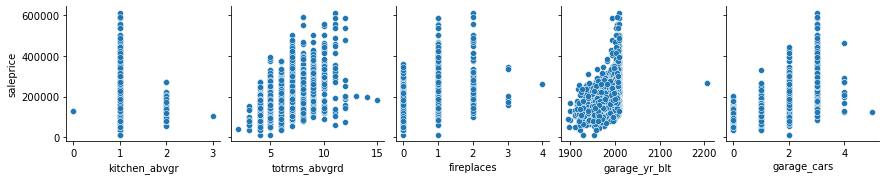

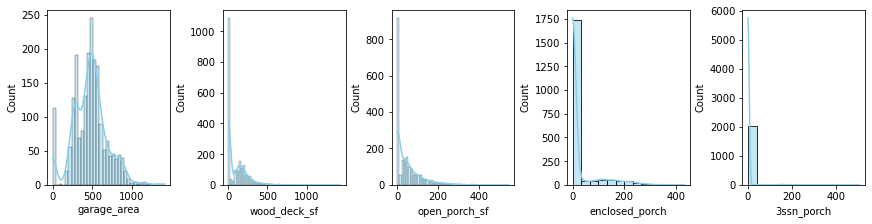

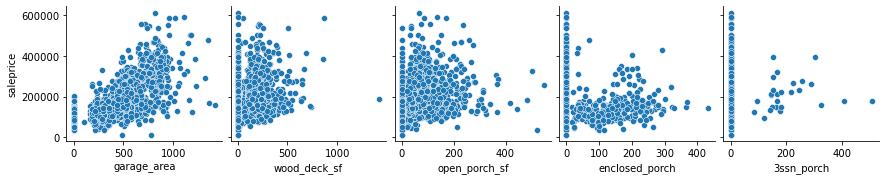

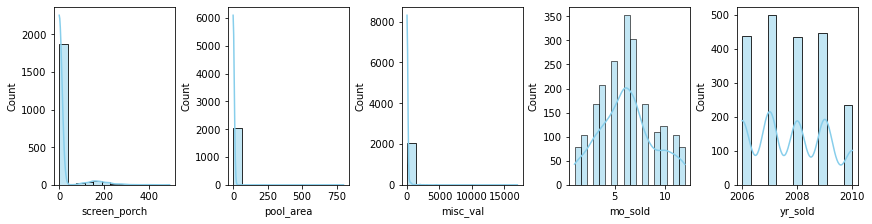

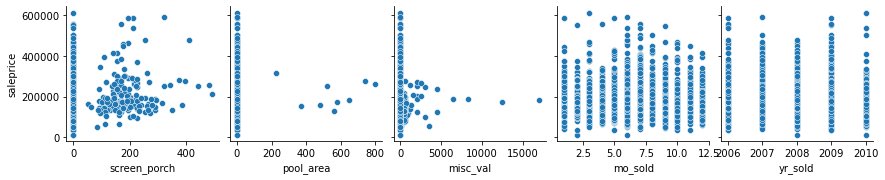

In [24]:
#plot the histogram of each numeric feature and its pairplot with 'saleprice'
i = 0
columns_in_a_row = 5
while i < (len(features_numeric)):
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))
    for j in range(columns_in_a_row):
        if i+j < (len(features_numeric)):
            sns.histplot(data=df, x=features_numeric[i+j], kde=True, color="skyblue", ax=axs[j])
    sns.pairplot(df, x_vars=features_numeric[i:min(i+columns_in_a_row,len(features_numeric))], y_vars=["saleprice"])
    i +=columns_in_a_row

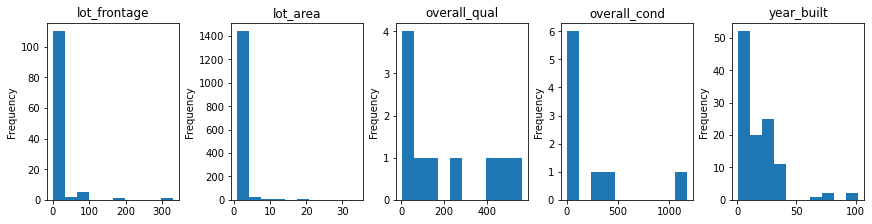

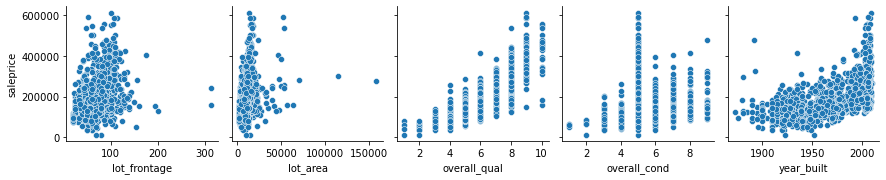

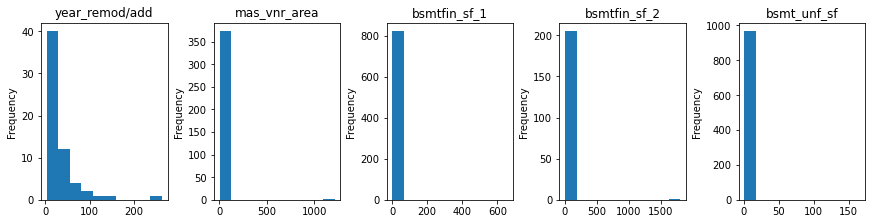

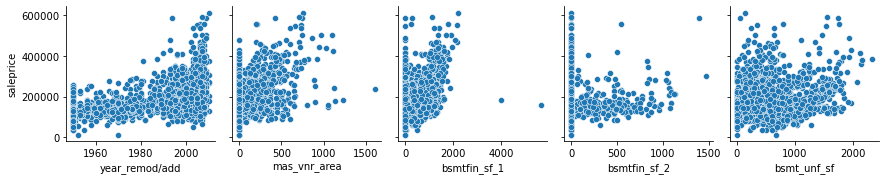

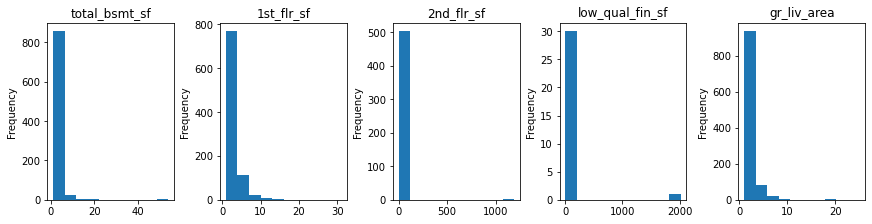

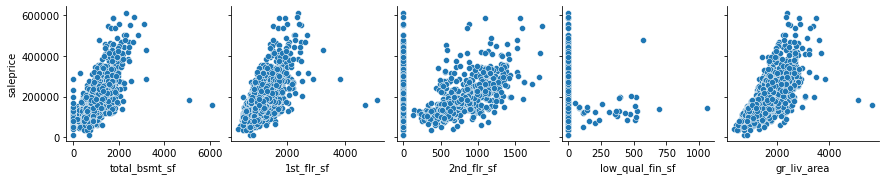

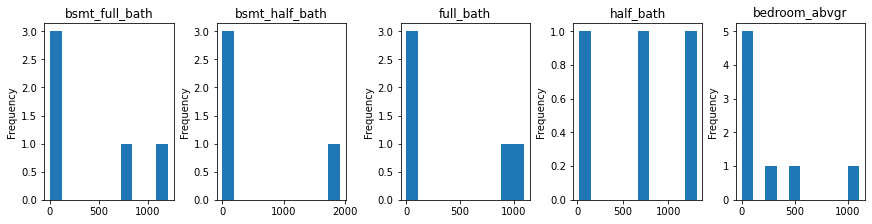

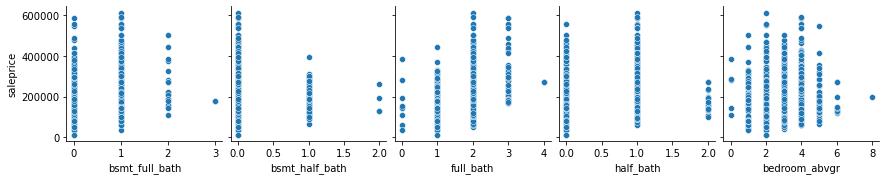

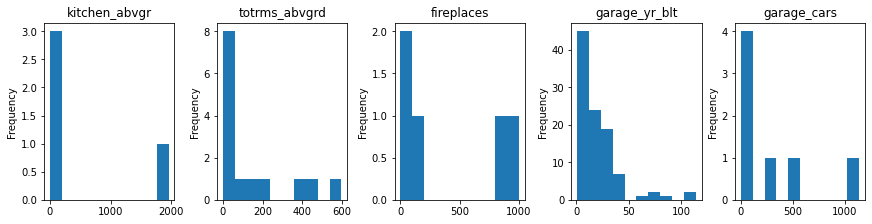

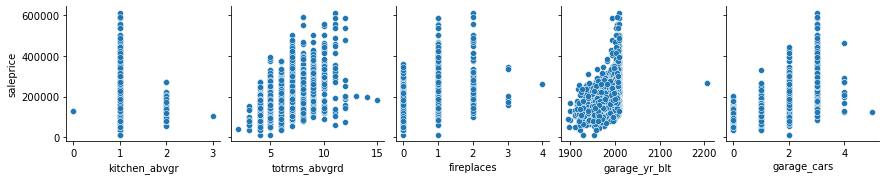

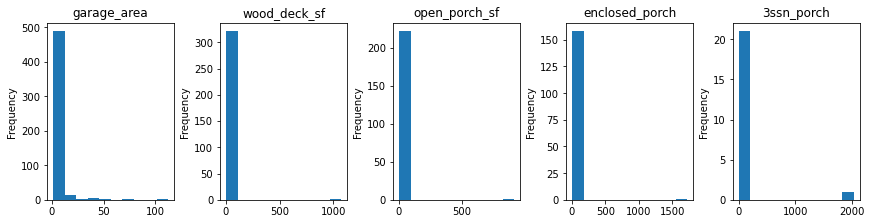

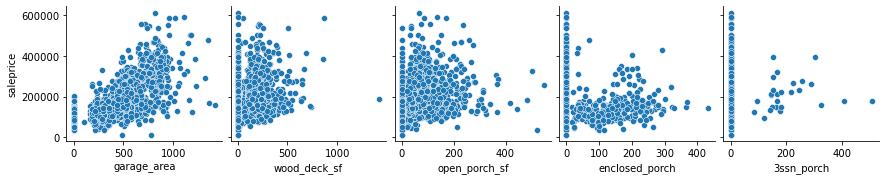

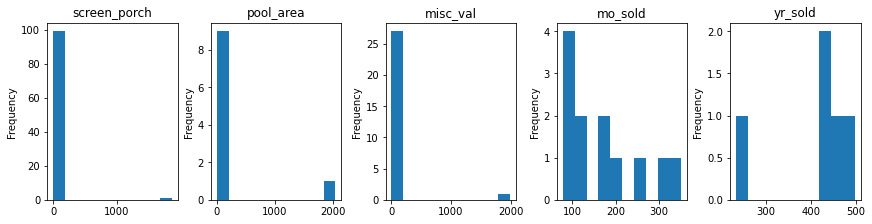

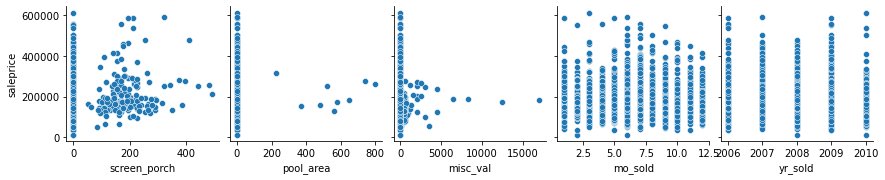

In [39]:
#plot the histogram of each numeric feature and its pairplot with 'saleprice'
i = 0
columns_in_a_row = 5
while i < (len(features_numeric)):
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))
    for j in range(columns_in_a_row):
        if i+j < (len(features_numeric)):
            #sns.histplot(data=df, x=features_numeric[i+j], kde=True, color="skyblue", ax=axs[j])
            df[features_numeric[i+j]].value_counts(dropna=False).plot(title=features_numeric[i+j], kind='hist',ax=axs[j])
    sns.pairplot(df, x_vars=features_numeric[i:min(i+columns_in_a_row,len(features_numeric))], y_vars=["saleprice"])
    i +=columns_in_a_row

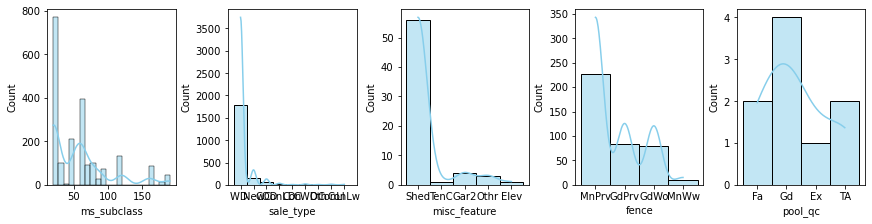

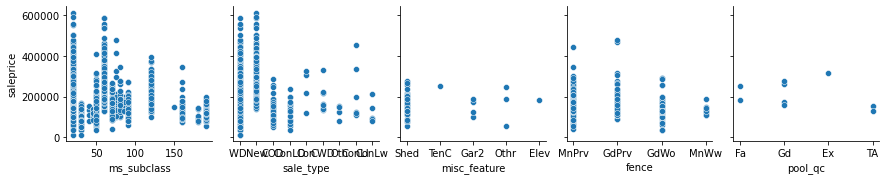

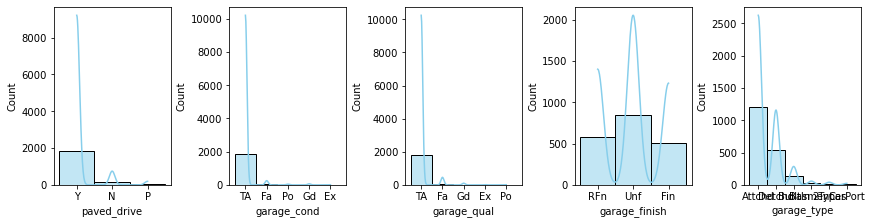

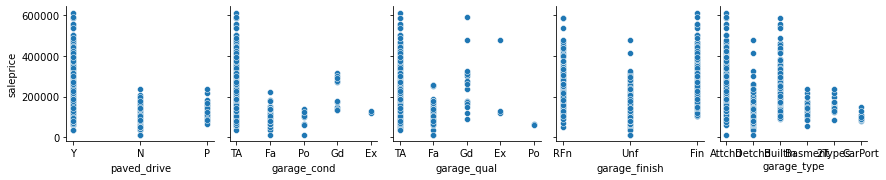

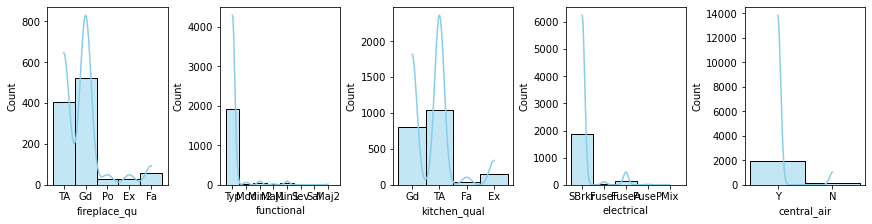

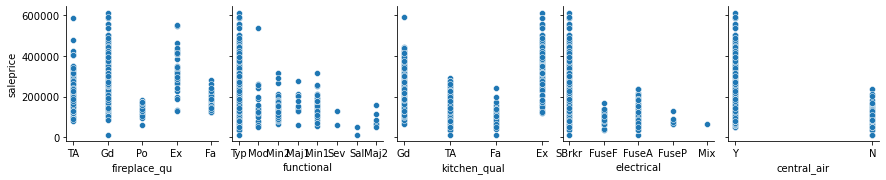

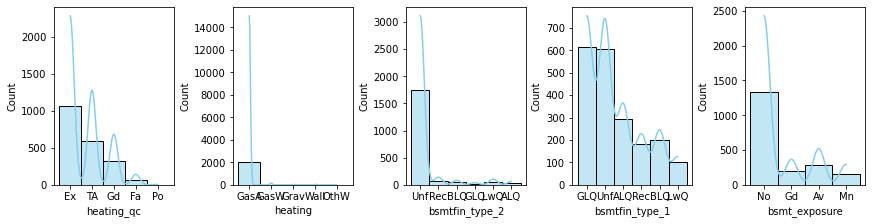

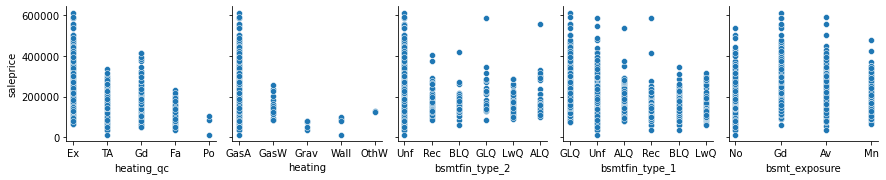

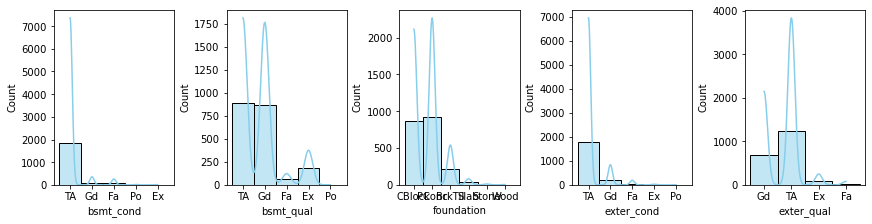

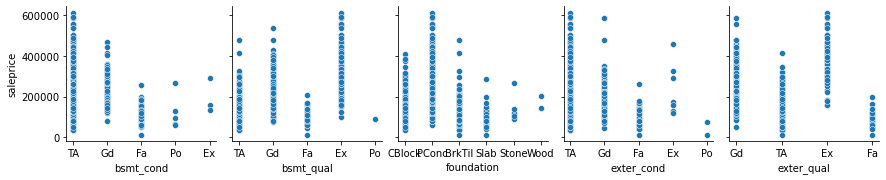

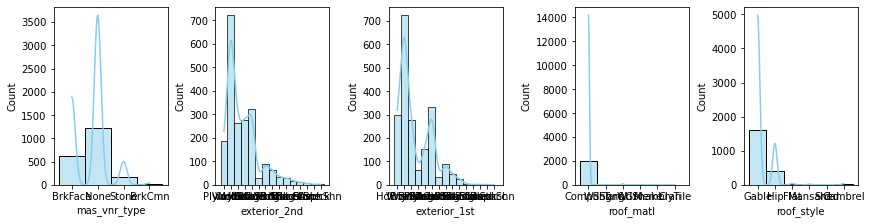

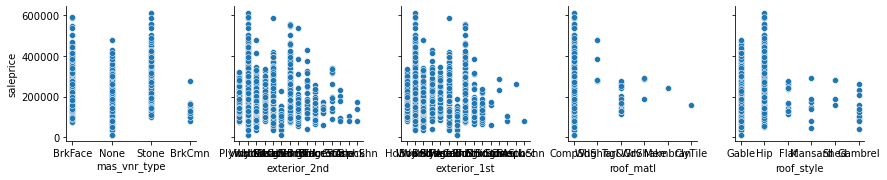

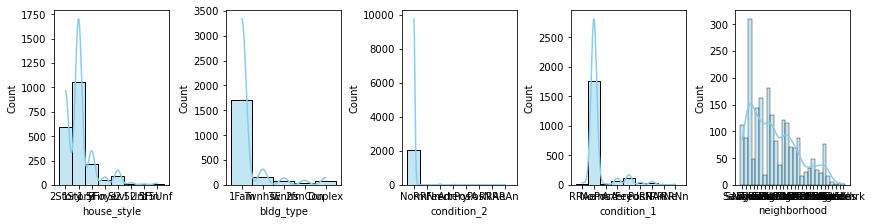

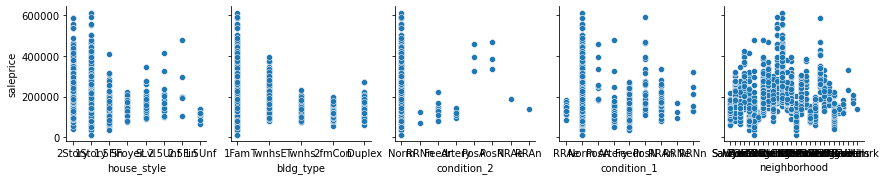

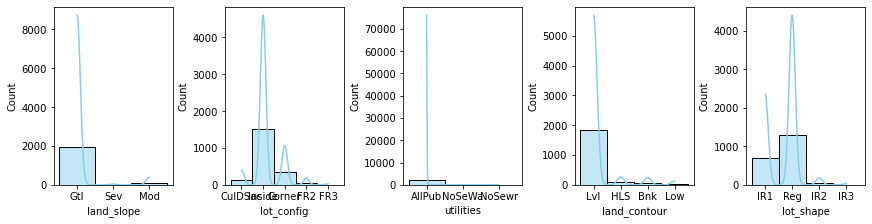

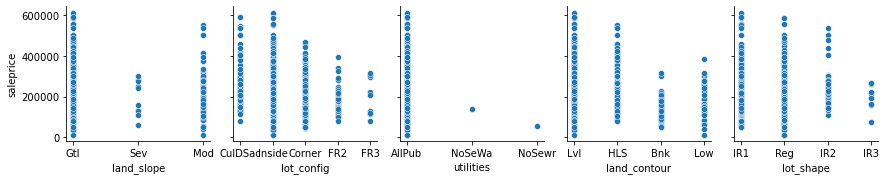

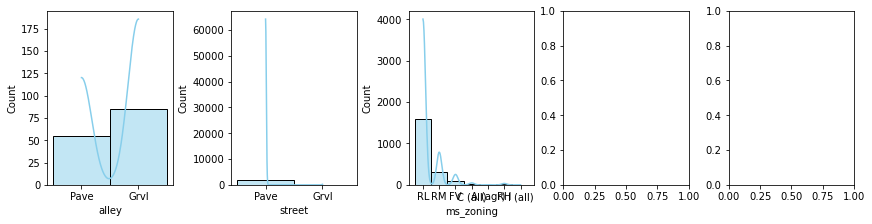

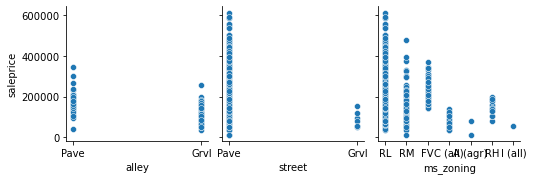

In [25]:
#plot the histogram of each catagorical feature and its pairplot with 'saleprice'
i = 0
columns_in_a_row = 5
while i < (len(features_catagorical)):
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))
    for j in range(columns_in_a_row):
        if i+j < (len(features_catagorical)):
            sns.histplot(data=df, x=features_catagorical[i+j], kde=True, color="skyblue", ax=axs[j])
      
    sns.pairplot(df, x_vars=features_catagorical[i:min(i+columns_in_a_row,len(features_catagorical))], y_vars=["saleprice"])
    sns.boxplot(x="ms_subclass", y="saleprice", data=df)
    i +=columns_in_a_row

In [55]:
def plot_features_numeric(df,x_columns, y_column):
    fig, axs = plt.subplots(1, len(x_columns),constrained_layout=True, figsize=(12,3))
    for i in range(len(x_columns)):
        sns.histplot(data=df, x=x_columns[i], kde=True, color="skyblue", ax=axs[i])
    sns.pairplot(df, x_vars=x_columns, y_vars=y_column)

In [ ]:
def plot_features_catagorical(df,x_columns, y_column):
    fig, axs = plt.subplots(1, len(x_columns),constrained_layout=True, figsize=(12,3))
    for i in range(len(x_columns)):
        sns.histplot(data=df, x=x_columns[i], kde=False, color="skyblue", ax=axs[i])
    
    fig2, axs2 = plt.subplots(1, len(x_columns),constrained_layout=True, figsize=(12,3))
    for j in range(len(x_columns)):
         sns.boxplot(x=x_columns[j], y=y_column, data=df, ax=axs2[j])
    

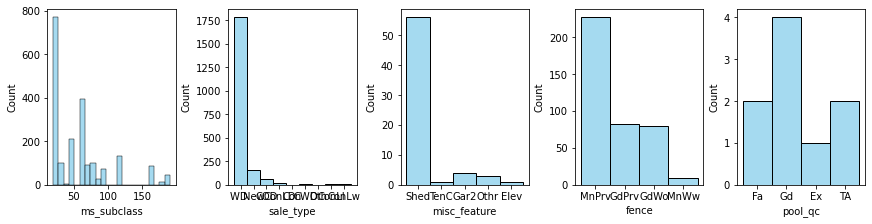

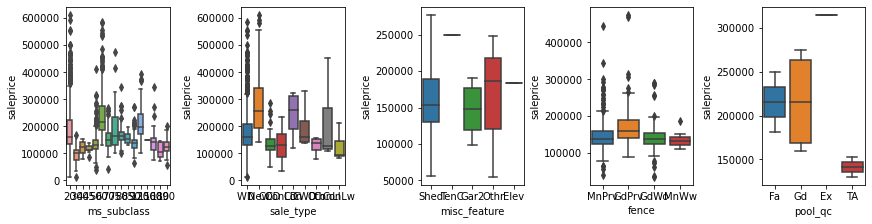

In [63]:
plot_features_catagorical(df,features_catagorical[:5], "saleprice")

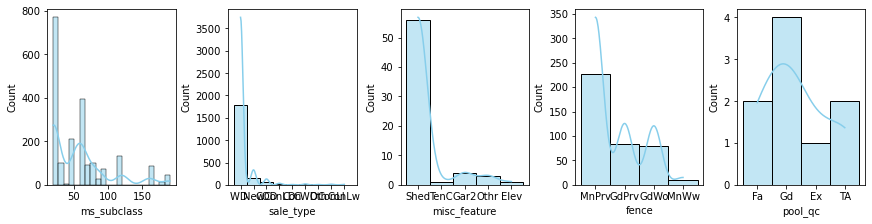

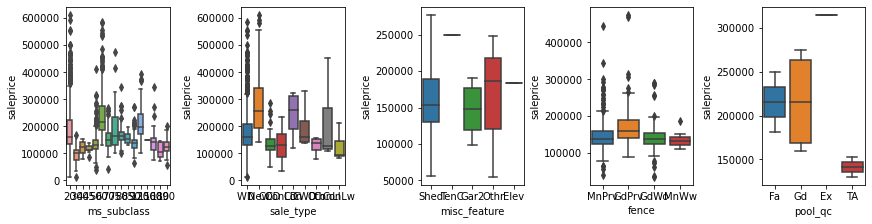

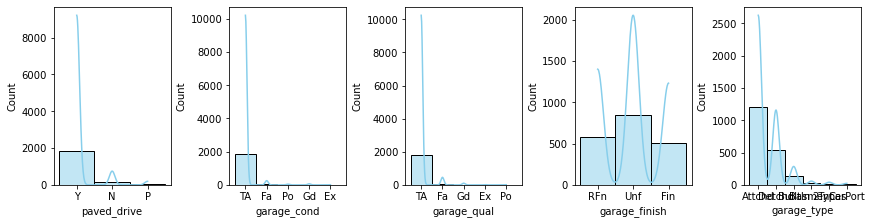

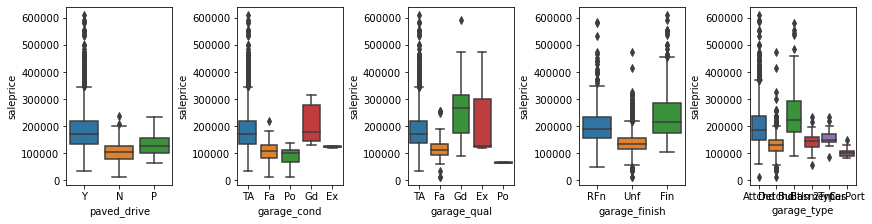

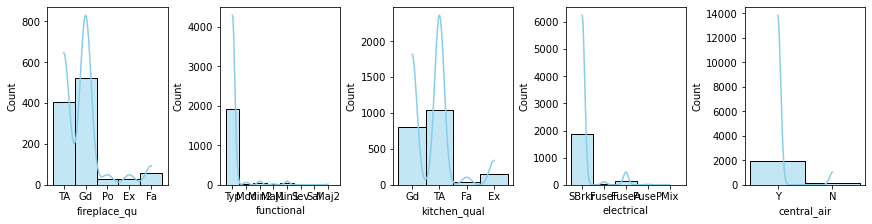

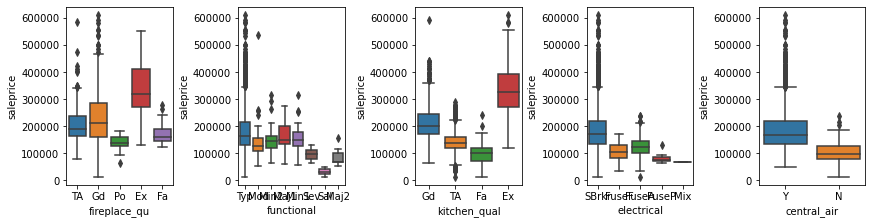

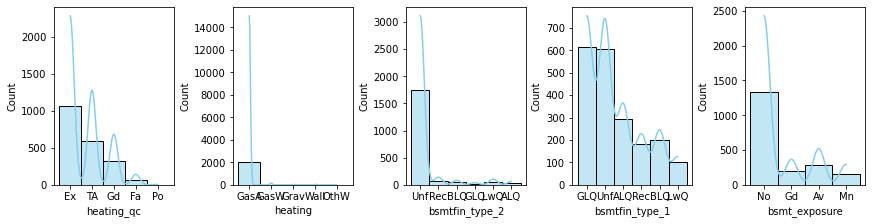

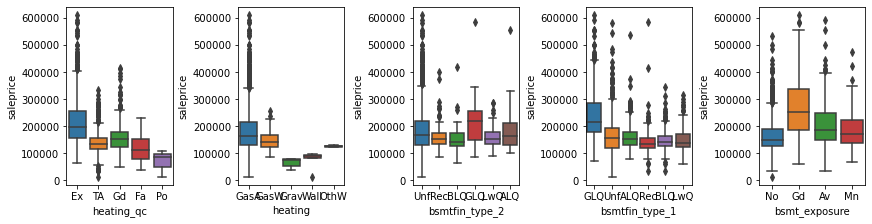

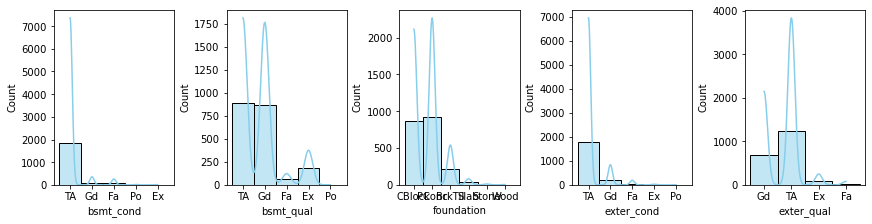

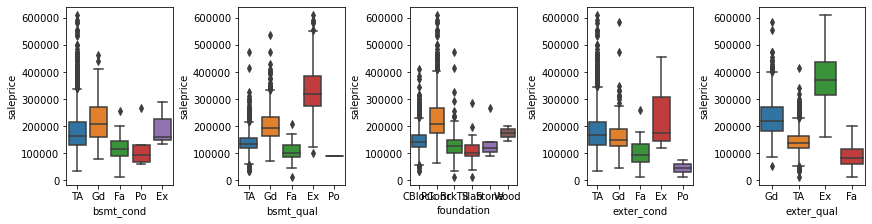

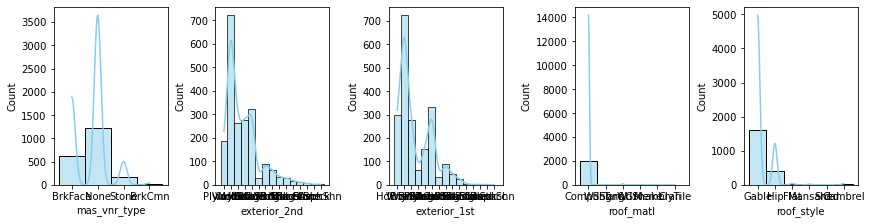

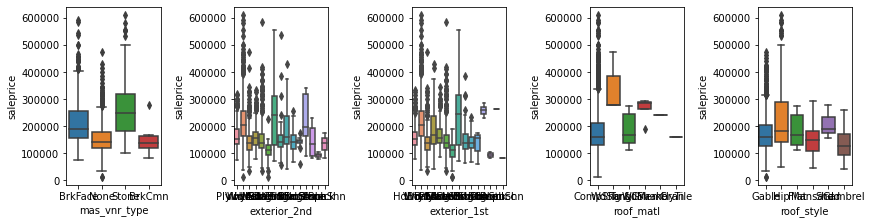

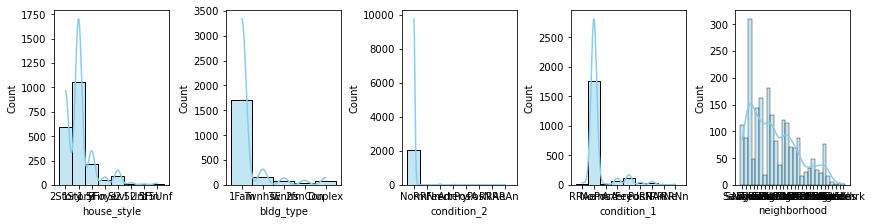

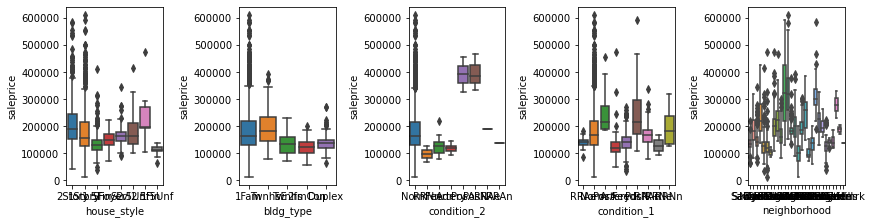

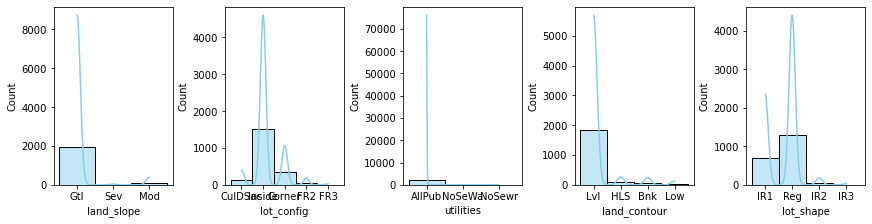

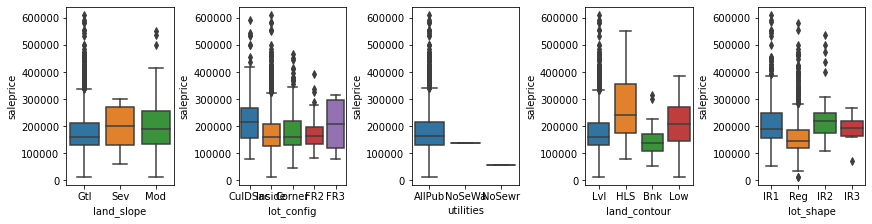

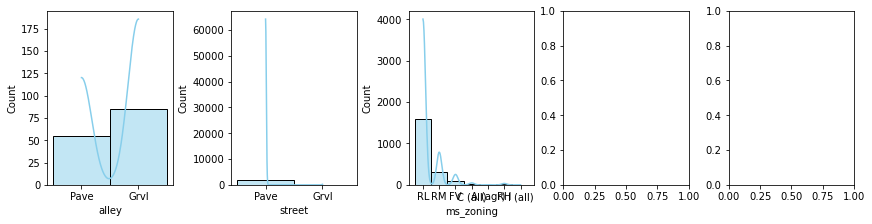

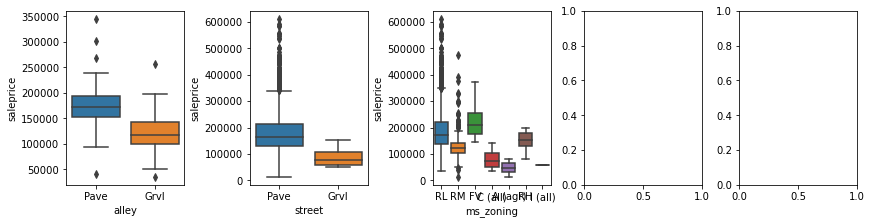

In [28]:
#plot the histogram of each catagorical feature and its pairplot with 'saleprice'
i = 0
columns_in_a_row = 5
while i < (len(features_catagorical)):
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))
    for j in range(columns_in_a_row):
        if i+j < (len(features_catagorical)):
            sns.histplot(data=df, x=features_catagorical[i+j], kde=True, color="skyblue", ax=axs[j])
      
    fig2, axs2 = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))
    for j in range(columns_in_a_row):
        if i+j < (len(features_catagorical)):
            #sns.histplot(data=df, x=features_catagorical[i+j], kde=True, color="skyblue", ax=axs2[j])
            sns.boxplot(x=features_catagorical[i+j], y="saleprice", data=df, ax=axs2[j])
            
    #sns.pairplot(df, x_vars=features_catagorical[i:min(i+columns_in_a_row,len(features_catagorical))], y_vars=["saleprice"])
   
    i +=columns_in_a_row

In [ ]:
          sns.boxplot(x="ms_subclass", y="saleprice", data=df, ax=axs[j+1])

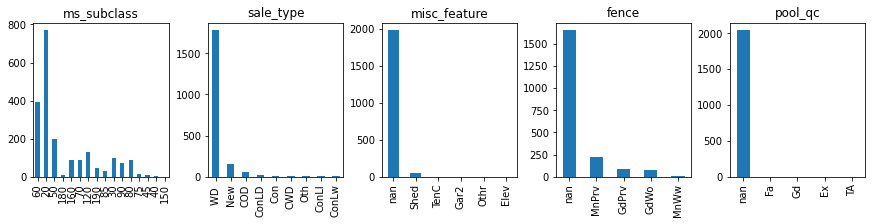

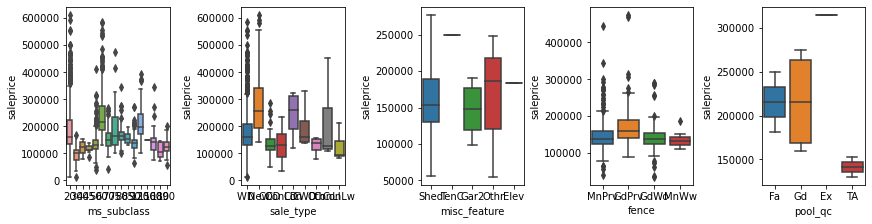

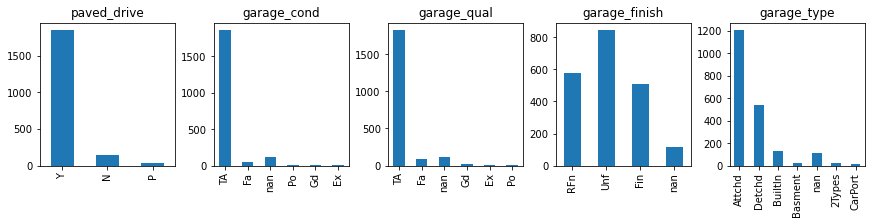

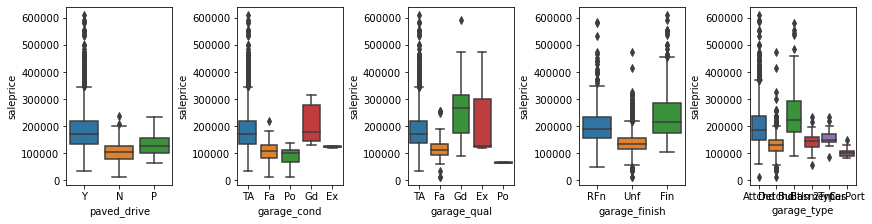

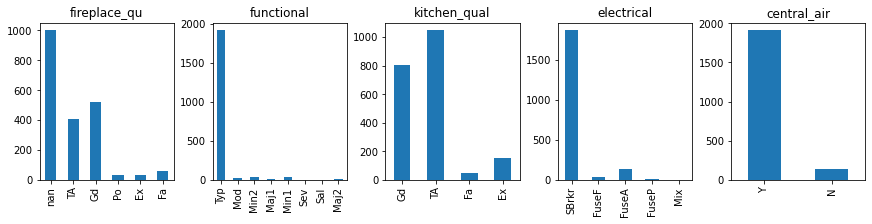

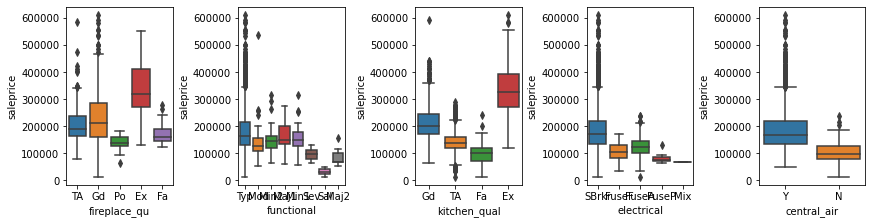

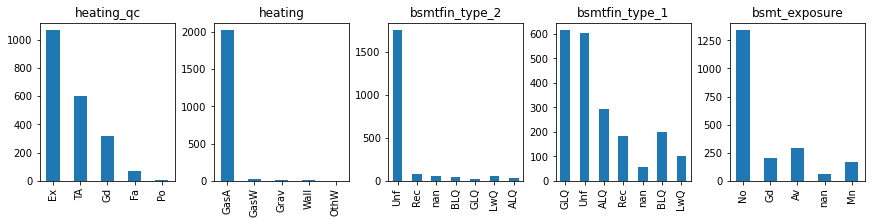

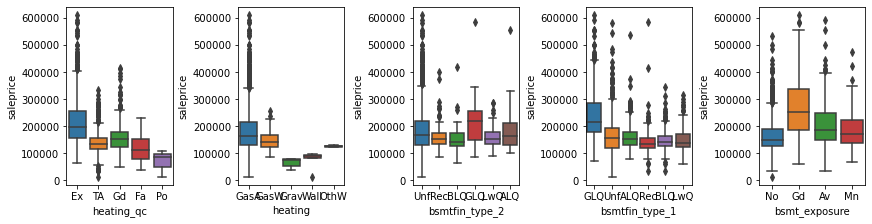

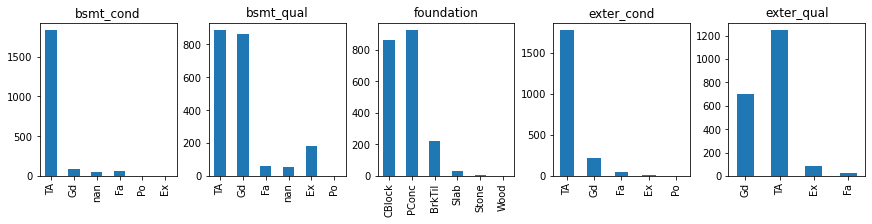

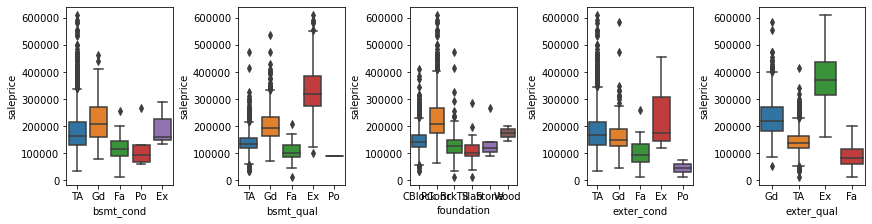

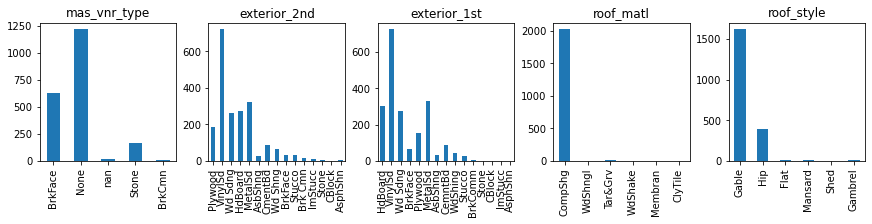

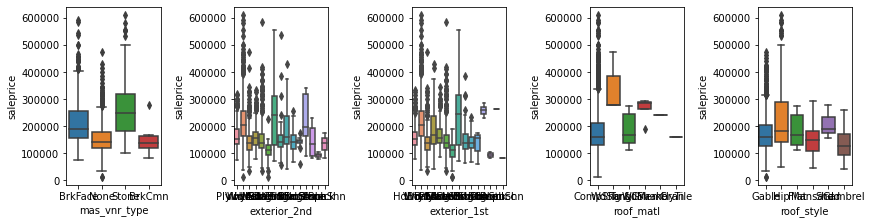

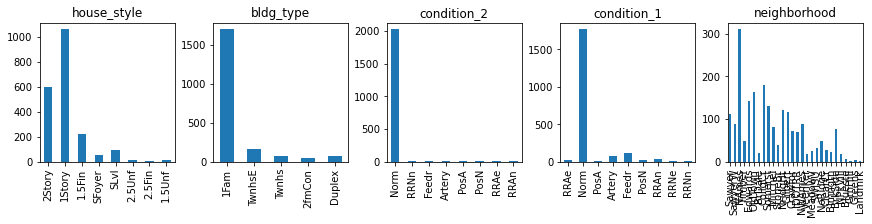

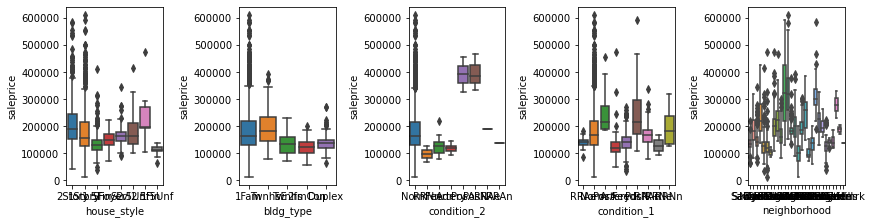

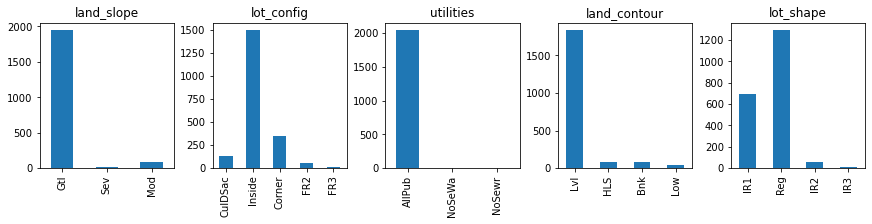

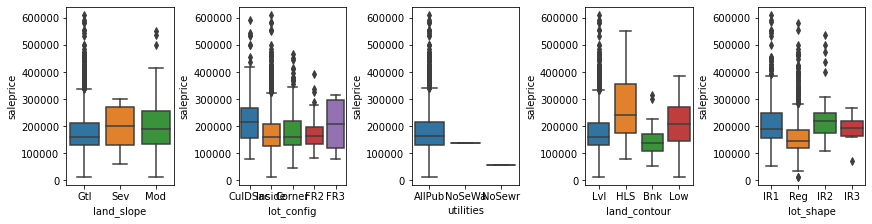

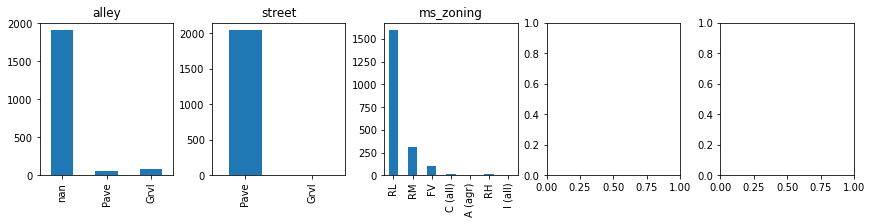

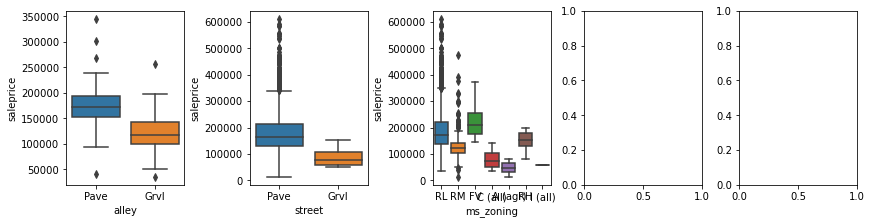

In [54]:
#plot the histogram of each numeric feature and its pairplot with 'saleprice'
i = 0
columns_in_a_row = 5
while i < (len(features_catagorical)):
    fig, axs = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))
    for j in range(columns_in_a_row):
        if i+j < (len(features_catagorical)):
            #sns.histplot(data=df, x=features_numeric[i+j], kde=True, color="skyblue", ax=axs[j])
            df[features_catagorical[i+j]].value_counts(dropna=False,sort=False).plot(title=features_catagorical[i+j], kind='bar',ax=axs[j])
       
    fig2, axs2 = plt.subplots(1, columns_in_a_row,constrained_layout=True, figsize=(12,3))
    for j in range(columns_in_a_row):
        if i+j < (len(features_catagorical)):
            #sns.histplot(data=df, x=features_catagorical[i+j], kde=True, color="skyblue", ax=axs2[j])
            sns.boxplot(x=features_catagorical[i+j], y="saleprice", data=df, ax=axs2[j])
     
    i +=columns_in_a_row

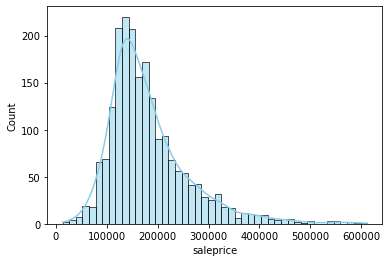

In [46]:
sns.histplot(data=df, x='saleprice', kde=True, color="skyblue")
plt.show();


In [48]:
from scipy import stats

_, p = stats.normaltest(df['saleprice'])
print(p)

4.635137528865828e-137


In [50]:
y_sqrt = (df['saleprice'])**(0.5)
_, p = stats.normaltest(y_sqrt)
print(p)

1.3775989984223007e-49


In [51]:
y_log = np.log(df['saleprice'])
_, p = stats.normaltest(y_log)
print(p)

3.415079112898754e-22


In [52]:

y_bc, lambda_bc = stats.boxcox(df['saleprice'])
_, p = stats.normaltest(y_bc)
print(p)

2.3920594213839245e-15


In [8]:
df["id"].value_counts(dropna=False,ascending=False)

109     1
2006    1
153     1
318     1
255     1
138     1
2827    1
145     1
1942    1
1956    1
1044    1
2752    1
807     1
1177    1
1480    1
2860    1
324     1
770     1
2063    1
69      1
2062    1
351     1
2393    1
12      1
2339    1
624     1
86      1
1534    1
2243    1
1957    1
1311    1
380     1
2517    1
230     1
1933    1
820     1
675     1
2910    1
21      1
1873    1
2125    1
1489    1
2383    1
983     1
1325    1
1378    1
1537    1
905     1
1532    1
132     1
1078    1
2511    1
912     1
2351    1
330     1
2586    1
224     1
98      1
2565    1
1934    1
997     1
64      1
1799    1
2866    1
1295    1
2278    1
2235    1
2833    1
1707    1
2428    1
242     1
1564    1
2613    1
2832    1
2459    1
1360    1
2723    1
1350    1
136     1
1836    1
367     1
124     1
1309    1
402     1
1592    1
2409    1
539     1
1940    1
588     1
96      1
1187    1
2154    1
550     1
811     1
1993    1
2202    1
779     1
1724    1
1881    1
2450    1


In [9]:
df["pid"].value_counts(dropna=False,ascending=False)

533352170    1
903201090    1
535304180    1
916386060    1
906425045    1
535126040    1
908186070    1
535154050    1
535353130    1
535426130    1
527451290    1
906380150    1
906226060    1
533236070    1
907418040    1
909276010    1
923202105    1
905101490    1
905107140    1
528458070    1
905106150    1
527131030    1
528142010    1
527165230    1
527250040    1
535104120    1
532376160    1
909277040    1
911103060    1
535450190    1
902301140    1
527355150    1
533250130    1
905109170    1
535302070    1
906340110    1
535426150    1
923225240    1
527358140    1
534177210    1
907135050    1
908102260    1
528110050    1
923275040    1
902406090    1
905102170    1
909281110    1
909101140    1
909275050    1
534475100    1
528188090    1
533221080    1
909250220    1
527356020    1
923226250    1
535305120    1
905106140    1
533212020    1
534479300    1
535304170    1
527107010    1
528382020    1
528458130    1
909282060    1
902109160    1
923202134    1
910201050 

In [10]:
df["lot_frontage"].value_counts(dropna=False,ascending=False)

NaN      330
60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
75.0      68
85.0      52
63.0      38
24.0      33
78.0      33
21.0      32
64.0      31
74.0      31
90.0      31
72.0      30
62.0      28
68.0      28
73.0      25
100.0     23
82.0      21
43.0      20
52.0      20
57.0      20
79.0      19
66.0      19
67.0      18
53.0      18
59.0      18
51.0      16
76.0      16
88.0      16
56.0      15
84.0      14
69.0      14
81.0      14
55.0      14
58.0      13
91.0      13
71.0      13
40.0      13
92.0      13
35.0      13
44.0      12
48.0      11
34.0      11
96.0      11
30.0      11
77.0      11
41.0      11
95.0      11
61.0      10
83.0      10
105.0      9
107.0      9
110.0      9
93.0       9
87.0       8
120.0      8
45.0       8
94.0       8
42.0       8
102.0      7
98.0       7
86.0       7
89.0       6
54.0       6
47.0       6
32.0       6
37.0       6
103.0      5
36.0       5
39.0       4
97.0       4
38.0       4
108.0      4
129.0      4

In [31]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

pool_qc            0.995612
misc_feature       0.968308
alley              0.931741
fence              0.804973
fireplace_qu       0.487567
lot_frontage       0.160897
garage_yr_blt      0.055583
garage_cond        0.055583
garage_qual        0.055583
garage_finish      0.055583
garage_type        0.055095
bsmt_exposure      0.028279
bsmtfin_type_2     0.027304
bsmt_cond          0.026816
bsmt_qual          0.026816
bsmtfin_type_1     0.026816
mas_vnr_type       0.010726
mas_vnr_area       0.010726
bsmt_full_bath     0.000975
bsmt_half_bath     0.000975
garage_cars        0.000488
garage_area        0.000488
total_bsmt_sf      0.000488
bsmt_unf_sf        0.000488
bsmtfin_sf_2       0.000488
bsmtfin_sf_1       0.000488
2nd_flr_sf         0.000000
low_qual_fin_sf    0.000000
1st_flr_sf         0.000000
half_bath          0.000000
gr_liv_area        0.000000
full_bath          0.000000
id                 0.000000
bedroom_abvgr      0.000000
kitchen_abvgr      0.000000
totrms_abvgrd      0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lot_frontage,1721.0,69.055200,23.260653,21.0,58.0,68.0,80.00,313.0
lot_area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.50,159000.0
overall_qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.00,10.0
overall_cond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.00,9.0
year_built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0,2001.00,2010.0
year_remod/add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0,2004.00,2010.0
mas_vnr_area,2029.0,99.695909,174.963129,0.0,0.0,0.0,161.00,1600.0
bsmtfin_sf_1,2050.0,442.300488,461.204124,0.0,0.0,368.0,733.75,5644.0
bsmtfin_sf_2,2050.0,47.959024,165.000901,0.0,0.0,0.0,0.00,1474.0
bsmt_unf_sf,2050.0,567.728293,444.954786,0.0,220.0,474.5,811.00,2336.0


In [13]:
print("garage_yr_blt have wrong max year: 2207")

garage_yr_blt have wrong max year: 2207


In [15]:
features_house_size =["lot_frontage","lot_area","mas_vnr_area","bsmtfin_sf_1",
                      "bsmtfin_sf_2","bsmt_unf_sf","total_bsmt_sf",
                      "1st_flr_sf","2nd_flr_sf","low_qual_fin_sf",
                      "gr_liv_area","garage_area"]

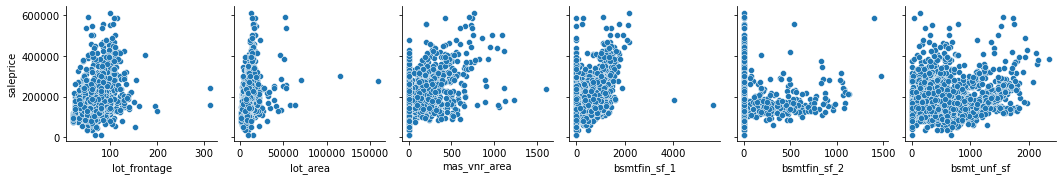

In [16]:
sns.pairplot(df, x_vars=features_house_size[:6], y_vars=["saleprice"])

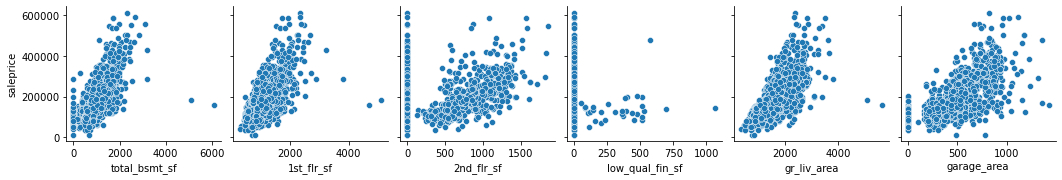

In [17]:
sns.pairplot(df, x_vars=features_house_size[6:], y_vars=["saleprice"])

In [18]:
features_age = ['year_built','year_remod/add']

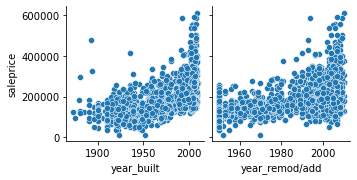

In [19]:
sns.pairplot(df, x_vars=features_age, y_vars=["saleprice"])

<Figure size 3240x3240 with 0 Axes>

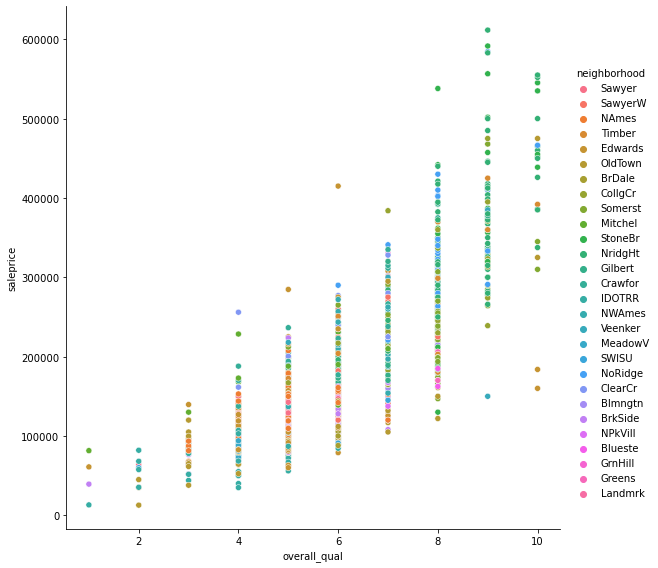

In [30]:
plt.figure(figsize=(45,45))
features_quality = ['overall_qual','overall_cond']
sns.pairplot(df, x_vars='overall_qual', y_vars=["saleprice"],hue='neighborhood',height=8
            )

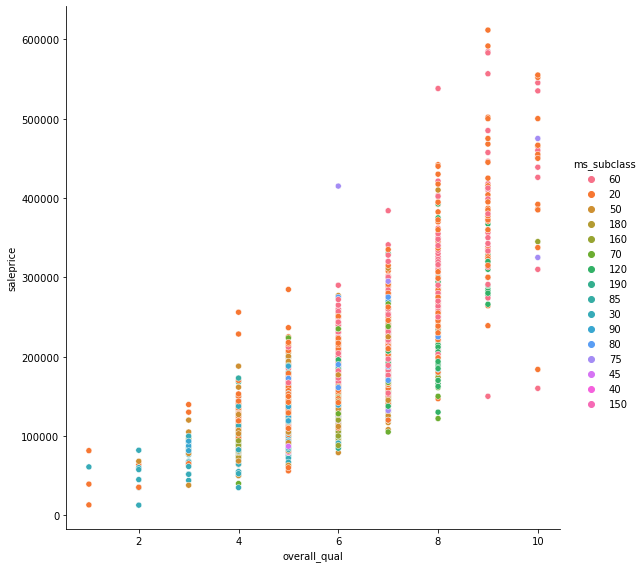

In [31]:
sns.pairplot(df, x_vars='overall_qual', y_vars=["saleprice"],hue='ms_subclass',height=8
            )

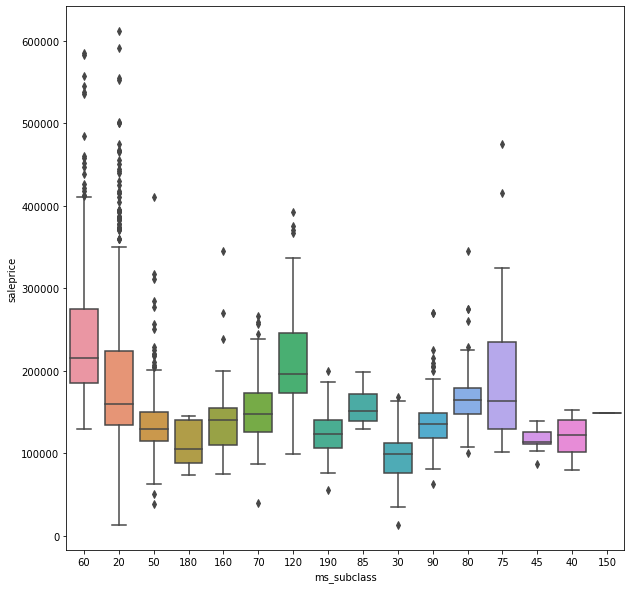

In [35]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="ms_subclass", y="saleprice", data=df)

In [58]:
df.groupby('ms_subclass')['saleprice'].count()

ms_subclass
120    132
150      1
160     88
180     11
190     46
20     770
30     101
40       4
45      11
50     198
60     394
70      90
75      16
80      86
85      28
90      75
Name: saleprice, dtype: int64

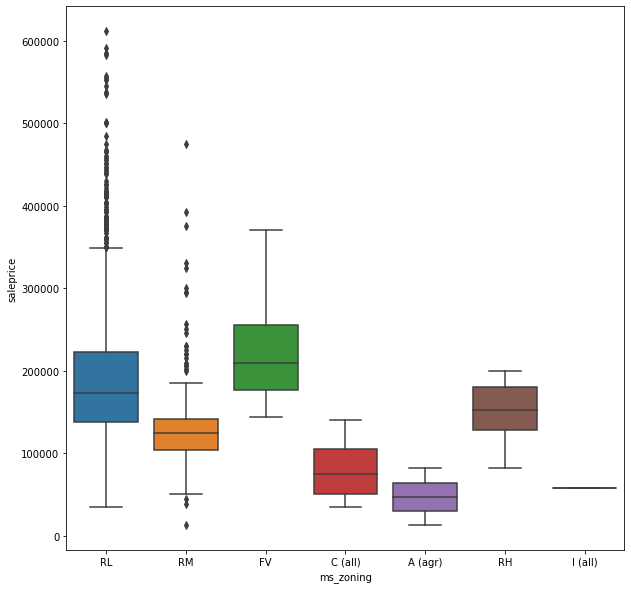

In [36]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="ms_zoning", y="saleprice", data=df)

In [59]:
df.groupby('ms_zoning')['saleprice'].count()

ms_zoning
A (agr)       2
C (all)      19
FV          101
I (all)       1
RH           14
RL         1598
RM          316
Name: saleprice, dtype: int64

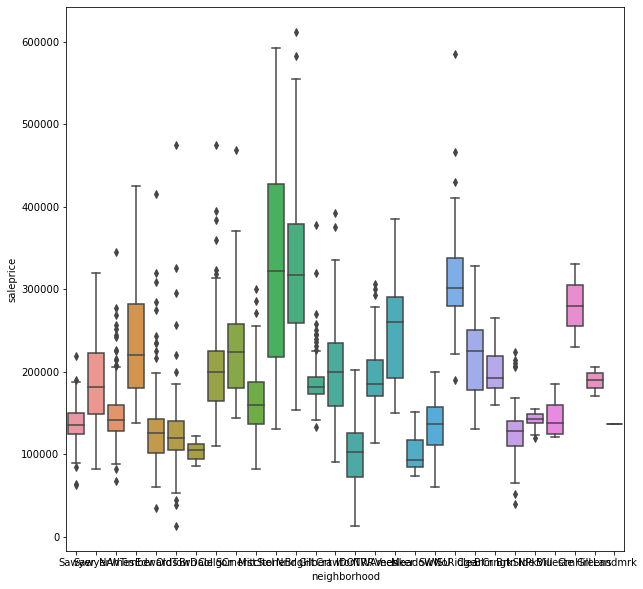

In [43]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="neighborhood", y="saleprice", data=df, orient="v")

In [60]:
df.groupby('neighborhood')['saleprice'].count()

neighborhood
Blmngtn     22
Blueste      6
BrDale      19
BrkSide     76
ClearCr     27
CollgCr    180
Crawfor     71
Edwards    143
Gilbert    116
Greens       3
GrnHill      2
IDOTRR      69
Landmrk      1
MeadowV     24
Mitchel     82
NAmes      310
NPkVill     17
NWAmes      87
NoRidge     48
NridgHt    122
OldTown    163
SWISU       32
Sawyer     111
SawyerW     87
Somerst    130
StoneBr     38
Timber      48
Veenker     17
Name: saleprice, dtype: int64

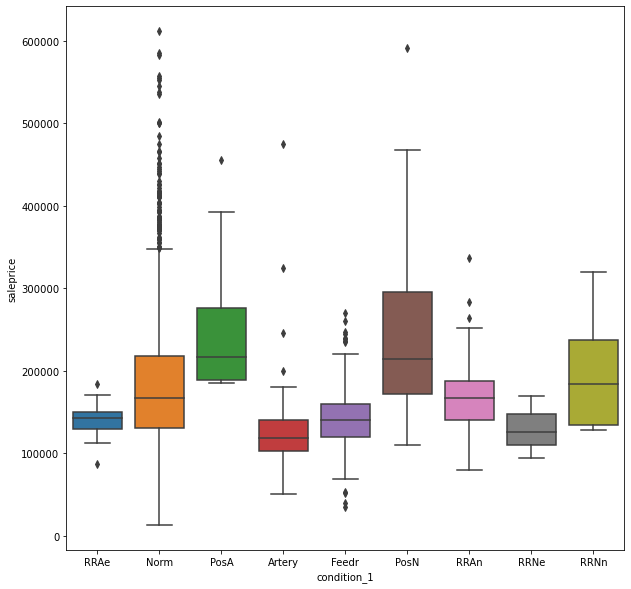

In [44]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="condition_1", y="saleprice", data=df, orient="v")

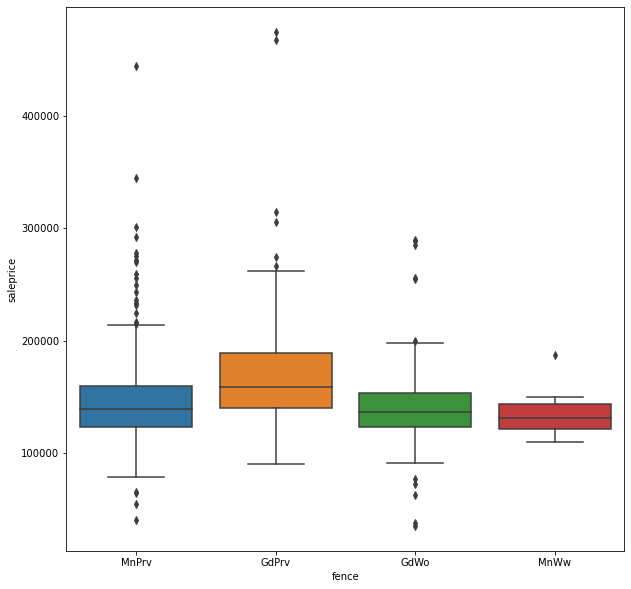

In [45]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="fence", y="saleprice", data=df, orient="v")

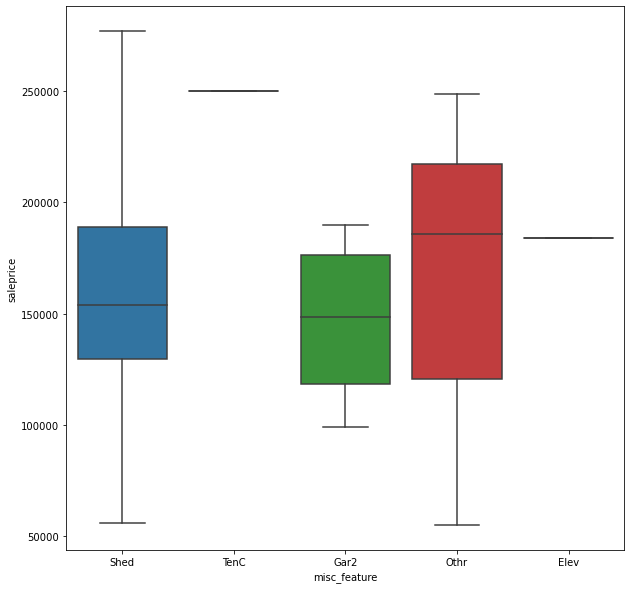

In [46]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="misc_feature", y="saleprice", data=df, orient="v")

In [57]:
df.groupby('misc_feature')['saleprice'].count()

misc_feature
Elev     1
Gar2     4
Othr     3
Shed    56
TenC     1
Name: saleprice, dtype: int64

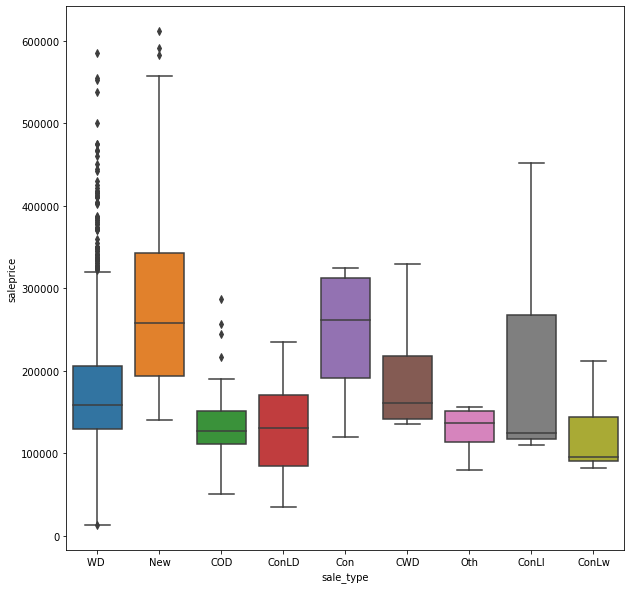

In [47]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="sale_type", y="saleprice", data=df, orient="v")

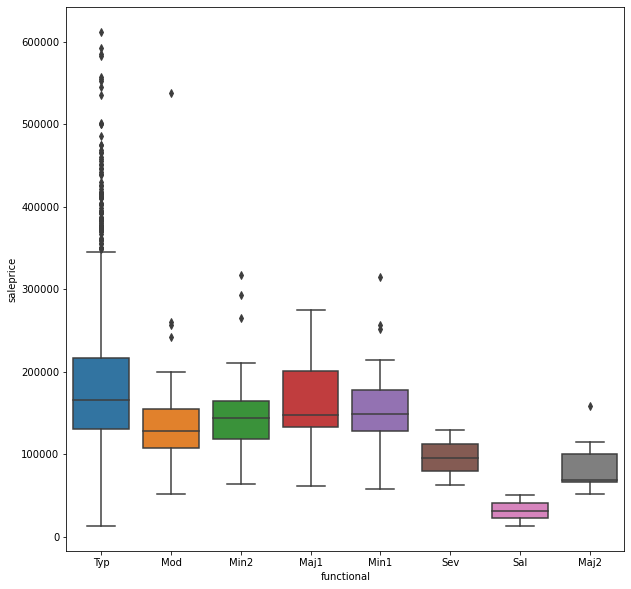

In [50]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="functional", y="saleprice", data=df, orient="v")

In [56]:
df.groupby('functional')['saleprice'].count()

functional
Maj1      12
Maj2       7
Min1      42
Min2      42
Mod       29
Sal        2
Sev        2
Typ     1915
Name: saleprice, dtype: int64

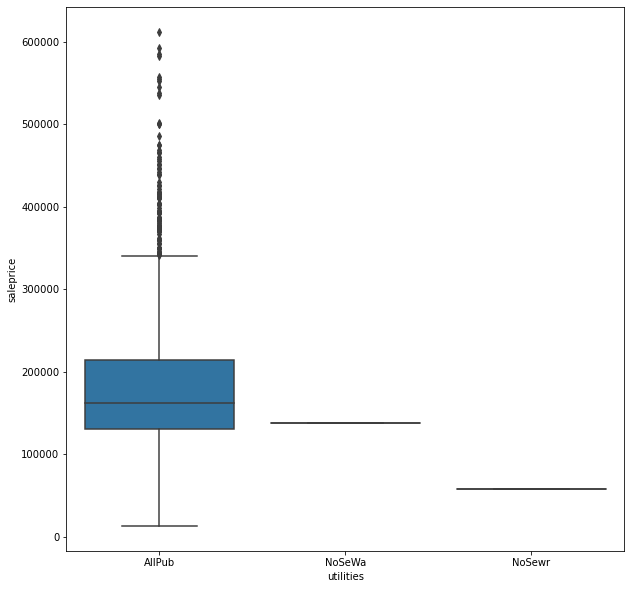

In [51]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="utilities", y="saleprice", data=df, orient="v")

In [55]:
df.groupby('utilities')['saleprice'].count()

utilities
AllPub    2049
NoSeWa       1
NoSewr       1
Name: saleprice, dtype: int64

<AxesSubplot:>

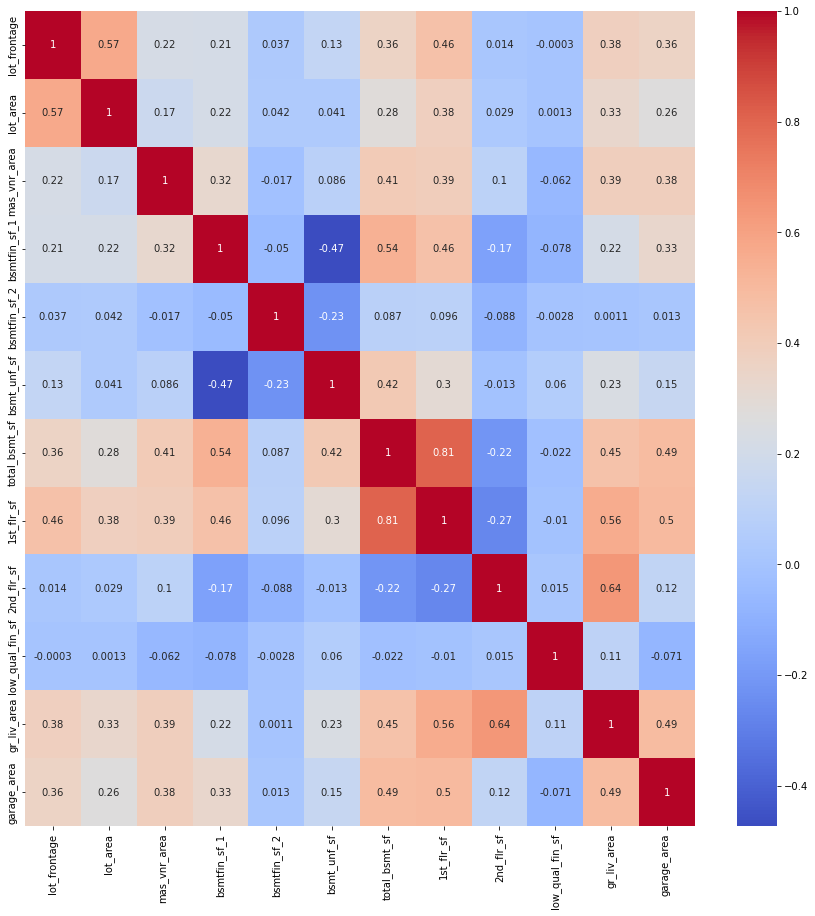

In [175]:
plt.figure(figsize=(15,15))
sns.heatmap(df[features_house_size].corr(), annot=True, cmap='coolwarm')

In [176]:
df.corr()['saleprice'].sort_values(ascending=False)

saleprice          1.000000
overall_qual       0.800207
gr_liv_area        0.697038
garage_area        0.650270
garage_cars        0.648220
total_bsmt_sf      0.628925
1st_flr_sf         0.618486
year_built         0.571849
year_remod/add     0.550370
full_bath          0.537969
garage_yr_blt      0.533922
mas_vnr_area       0.512230
totrms_abvgrd      0.504014
fireplaces         0.471093
bsmtfin_sf_1       0.423519
lot_frontage       0.341842
open_porch_sf      0.333476
wood_deck_sf       0.326490
lot_area           0.296566
bsmt_full_bath     0.283662
half_bath          0.283001
2nd_flr_sf         0.248452
bsmt_unf_sf        0.190210
bedroom_abvgr      0.137067
screen_porch       0.134581
3ssn_porch         0.048732
mo_sold            0.032735
pool_area          0.023106
bsmtfin_sf_2       0.016255
misc_val          -0.007375
yr_sold           -0.015203
low_qual_fin_sf   -0.041594
bsmt_half_bath    -0.045328
overall_cond      -0.097019
kitchen_abvgr     -0.125444
enclosed_porch    -0

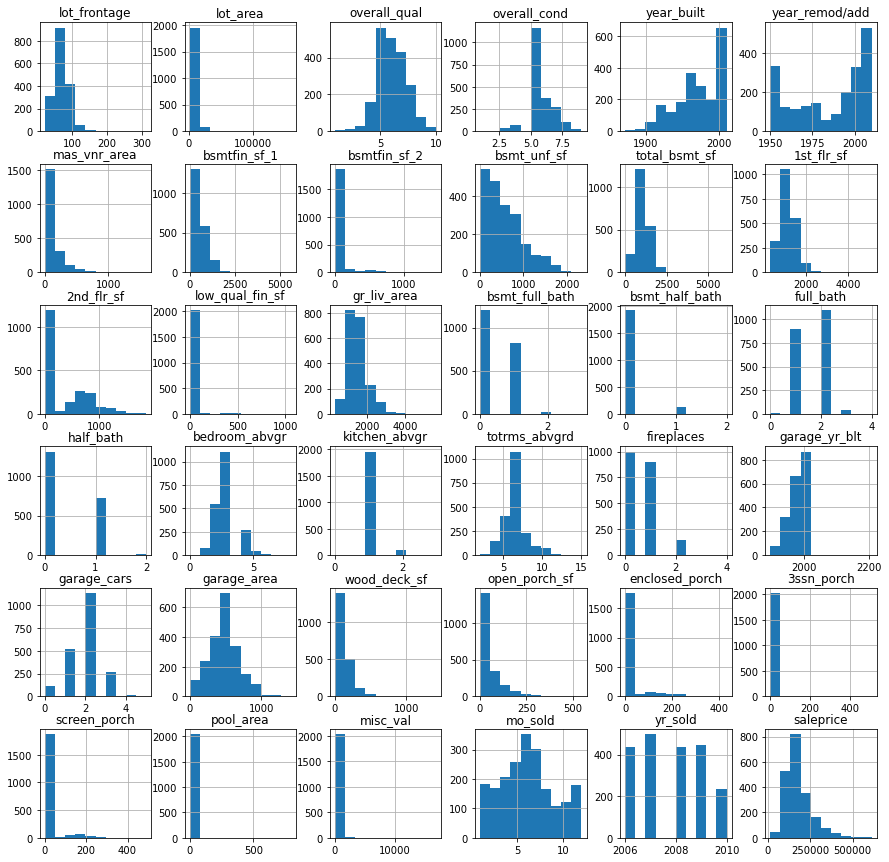

In [177]:
df.hist(figsize=(15, 15));

### EDA: Boxplots

C:\Users\olive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


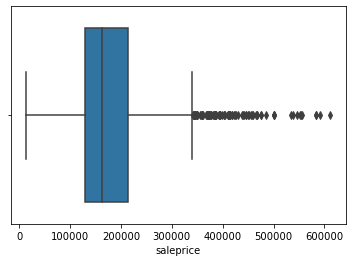

In [178]:
sns.boxplot(df['saleprice']);

In [44]:
sns.histplot(data=df, x='saleprice', kde=True, color="skyblue", ax=axs[j])
plt.show();

C:\Users\olive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


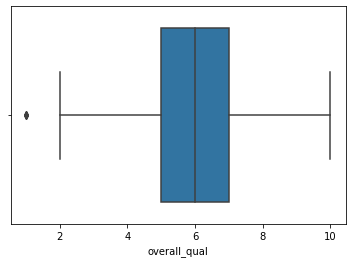

In [179]:
sns.boxplot(df['overall_qual']);

C:\Users\olive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


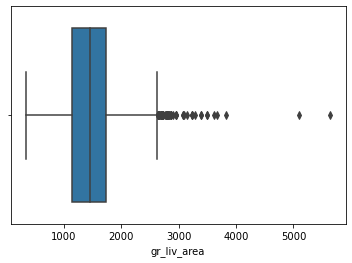

In [180]:
sns.boxplot(df['gr_liv_area']);

C:\Users\olive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


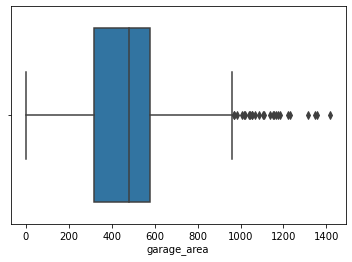

In [181]:
sns.boxplot(df['garage_area']);

### Model Prep: Create our features matrix ( X ) and target vector ( y )

In [182]:
features_numeric = [col for col in df._get_numeric_data().columns if col != 'saleprice']
X = df[features_numeric]
y = df['saleprice']

### fill missing data with mean

In [183]:
X.isnull().sum().sort_values(ascending=False)

lot_frontage       330
garage_yr_blt      114
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
bsmt_unf_sf          1
garage_cars          1
garage_area          1
total_bsmt_sf        1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
totrms_abvgrd        0
3ssn_porch           0
enclosed_porch       0
open_porch_sf        0
wood_deck_sf         0
screen_porch         0
pool_area            0
misc_val             0
mo_sold              0
fireplaces           0
full_bath            0
kitchen_abvgr        0
bedroom_abvgr        0
half_bath            0
lot_area             0
gr_liv_area          0
low_qual_fin_sf      0
2nd_flr_sf           0
1st_flr_sf           0
year_remod/add       0
year_built           0
overall_cond         0
overall_qual         0
yr_sold              0
dtype: int64

In [184]:
X.fillna(X.mean(),inplace=True)

C:\Users\olive\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [185]:
X.isnull().sum().sort_values(ascending=False)

lot_frontage       0
wood_deck_sf       0
kitchen_abvgr      0
totrms_abvgrd      0
fireplaces         0
garage_yr_blt      0
garage_cars        0
garage_area        0
open_porch_sf      0
half_bath          0
enclosed_porch     0
3ssn_porch         0
screen_porch       0
pool_area          0
misc_val           0
mo_sold            0
bedroom_abvgr      0
full_bath          0
lot_area           0
bsmtfin_sf_2       0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
mas_vnr_area       0
bsmtfin_sf_1       0
bsmt_unf_sf        0
bsmt_half_bath     0
total_bsmt_sf      0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
yr_sold            0
dtype: int64

### Model Prep: Train/test split
We always want to have a holdout set to test our model. Use the train_test_split function to split our X and y variables into a
training set and a holdout set.

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### statsmodels

In [187]:
results = sm.OLS(y_train, sm.add_constant(X_train, prepend=True)).fit()

C:\Users\olive\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [188]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:38:01   Log-Likelihood:                -18202.
No. Observations:                1538   AIC:                         3.647e+04
Df Residuals:                    1504   BIC:                         3.665e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -8.93e+05   1.35e+06     -0.660      0.509   -3.55e+06    1.76e+06
lot_frontage       28.1078     48.733      0.577      0.564     -67.484     123.700
lot_area            0.9696      0.210      4.618      0.000       0.558       1.381
overall_qual     1.745e+04   1080.706     16.144      0.000    1.53e+04    1.96e+04
overall_cond     3393.4663    973.054      3.487      0.001    1484.780    5302.153
year_built        242.7525     61.083      3.974      0.000     122.936     362.569
year_remod/add    242.1736     65.475      3.699      0.000     113.742     370.605
mas_vnr_area       37.3397      5.990      6.234      0.000      25.590      49.089
bsmtfin_sf_1        8.9121      2.283      3.904      0.000       4.434      13.390
bsmtfin_sf_2        2.0883      4.078      0.512      0.609      -5.911      10.088
bsmt_unf_sf        -1.4043      2.190     -0.641      0.522      -5.700       2.892
total_bsmt_sf       9.5961      3.019      3.179      0.002       3.674      15.518
1st_flr_sf         19.5371      5.361      3.644      0.000       9.021      30.053
2nd_flr_sf         11.1392      4.947      2.252      0.024       1.435      20.844
low_qual_fin_sf   -10.1152     12.739     -0.794      0.427     -35.102      14.872
gr_liv_area        20.5611      5.085      4.044      0.000      10.587      30.535
bsmt_full_bath   8980.2704   2365.933      3.796      0.000    4339.392    1.36e+04
bsmt_half_bath    807.3552   3720.348      0.217      0.828   -6490.266    8104.976
full_bath        2271.2519   2592.355      0.876      0.381   -2813.763    7356.267
half_bath       -1566.1479   2523.274     -0.621      0.535   -6515.657    3383.361
bedroom_abvgr   -5612.0634   1558.406     -3.601      0.000   -8668.944   -2555.183
kitchen_abvgr   -2.201e+04   4969.570     -4.428      0.000   -3.18e+04   -1.23e+04
totrms_abvgrd    6493.5151   1191.057      5.452      0.000    4157.206    8829.824
fireplaces       4533.3138   1718.467      2.638      0.008    1162.468    7904.160
garage_yr_blt     140.0810     61.550      2.276      0.023      19.349     260.814
garage_cars      5238.3451   2826.284      1.853      0.064    -305.532    1.08e+04
garage_area        12.5720      9.849      1.276      0.202      -6.747      31.891
wood_deck_sf       20.6918      7.757      2.668      0.008       5.476      35.907
open_porch_sf       5.9120     14.570      0.406      0.685     -22.667      34.491
enclosed_porch     21.5927     15.958      1.353      0.176      -9.710      52.895
3ssn_porch         29.5964     33.223      0.891      0.373     -35.572      94.765
screen_porch       99.6397     15.910      6.263      0.000      68.431     130.848
pool_area        -147.8107     23.184     -6.375      0.000    -193.288    -102.334
misc_val          -13.0229      1.456     -8.942      0.000

In [189]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
  
print(vif_data)


C:\Users\olive\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


            feature           VIF
0      lot_frontage  1.694930e+01
1          lot_area  7.646473e+00
2      overall_qual  6.207019e+01
3      overall_cond  4.103457e+01
4        year_built  1.957712e+04
5    year_remod/add  2.278566e+04
6      mas_vnr_area  1.967397e+00
7      bsmtfin_sf_1           inf
8      bsmtfin_sf_2           inf
9       bsmt_unf_sf           inf
10    total_bsmt_sf           inf
11       1st_flr_sf           inf
12       2nd_flr_sf           inf
13  low_qual_fin_sf           inf
14      gr_liv_area           inf
15   bsmt_full_bath  3.475183e+00
16   bsmt_half_bath  1.226026e+00
17        full_bath  2.506218e+01
18        half_bath  3.373194e+00
19    bedroom_abvgr  2.854285e+01
20    kitchen_abvgr  3.729765e+01
21    totrms_abvgrd  8.339049e+01
22       fireplaces  2.949358e+00
23    garage_yr_blt  1.999313e+04
24      garage_cars  4.005161e+01
25      garage_area  3.544524e+01
26     wood_deck_sf  1.983406e+00
27    open_porch_sf  1.927124e+00
28   enclosed_

In [190]:
df_lr_params = pd.DataFrame(results.params)
df_lr_params.reset_index(inplace=True)
df_lr_params.columns = ['feature','coefs']
df_lr_params.head()

,feature,coefs
0,const,-893034.497515
1,lot_frontage,28.107816
2,lot_area,0.969608
3,overall_qual,17446.873841
4,overall_cond,3393.466289


In [191]:
df_lr_params = pd.merge(left = df_lr_params,
                        right = vif_data, 
                        on ="feature" )

In [192]:
df_lr_params.sort_values(by=['coefs'],ascending=False,inplace=True)
df_lr_params.reset_index(inplace=True,drop=True)
df_lr_params.head(100)

,feature,coefs,VIF
0,overall_qual,17446.873841,6.207019e+01
1,bsmt_full_bath,8980.270422,3.475183e+00
2,totrms_abvgrd,6493.515141,8.339049e+01
3,garage_cars,5238.345107,4.005161e+01
4,fireplaces,4533.313822,2.949358e+00
5,overall_cond,3393.466289,4.103457e+01
6,full_bath,2271.251854,2.506218e+01
7,bsmt_half_bath,807.355241,1.226026e+00
8,mo_sold,243.448644,6.396353e+00
9,year_built,242.752538,1.957712e+04


In [44]:
# Initialze the estimators
clf1 = LinearRegression()
clf2 = LassoCV()
clf3 = RidgeCV()

In [48]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier'] = [clf1]
param2 = {}
param2['classifier__alphas'] = np.linspace(.1, 10, 100)
param2['classifier'] = [clf2]
param3 = {}
param3['classifier__alphas'] = np.linspace(.1, 10, 100)
param3['classifier'] = [clf3]


In [49]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3]

In [50]:
%%time
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error').fit(X_train, y_train)

C:\Users\olive\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
  warnings.warn(


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').